In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [2]:
#import dataset
customer_df = pd.read_csv('data/Data_Marketing_Customer_Analysis_Round2.csv')

In [3]:
# drop unnamed and costumer
def drop_columns(customer_df) :
    customer_df.drop(columns=['Unnamed: 0', 'Customer'], inplace=True)
    return customer_df

In [4]:
drop_columns(customer_df)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
# replace effective to date as month
pd.to_datetime(customer_df["Effective To Date"],format="%m/%d/%y")
customer_df['month'] = pd.DatetimeIndex(customer_df['Effective To Date']).month
print(customer_df['month'])
customer_df.month.value_counts()

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month, Length: 10910, dtype: int64


1    5818
2    5092
Name: month, dtype: int64

In [6]:
customer_df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type                      object
month           

In [7]:
# drop effective to date and convert month to object
def drop_columns_etd(customer_df) :
    customer_df.drop(columns=['Effective To Date'], inplace=True)
    return customer_df

In [8]:
drop_columns_etd(customer_df)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [9]:
#convert month to object
customer_df['month'] = customer_df['month'].astype('object')
customer_df['month']

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month, Length: 10910, dtype: object

In [10]:
customer_df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Vehicle Type                      object
month                             object
dtype: object

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly Premium Auto'>

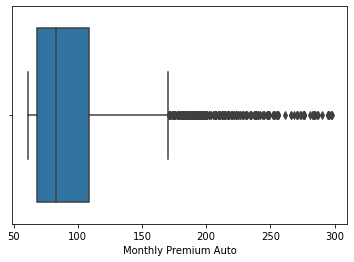

In [11]:
#boxplot of MPA
sns.boxplot(customer_df['Monthly Premium Auto'])

### remove the outliers starting the most impoprtant feature (Monthly Premium Auto)

In [12]:
# 'Monthly Premium Auto'
Q1_mpa = np.percentile(customer_df['Monthly Premium Auto'], 25)
Q3_mpa = np.percentile(customer_df['Monthly Premium Auto'], 75)
IQR_mpa = Q3_mpa - Q1_mpa

# data_clean = customer_df[((customer_df['Monthly Premium Auto']< (Q3+1.5*IQR)))]
data_clean = customer_df[((customer_df['Monthly Premium Auto'] > (Q1_mpa-1.5*IQR_mpa)) & 
                          (customer_df['Monthly Premium Auto']< (Q3_mpa+1.5*IQR_mpa)))]

In [13]:
Q1_clf = np.percentile(customer_df['Customer Lifetime Value'], 25)
Q3_clf = np.percentile(customer_df['Customer Lifetime Value'], 75)
IQR_clf = Q3_clf - Q1_clf

data_clean = data_clean[((data_clean['Customer Lifetime Value'] > (Q1_clf-1.5*IQR_clf)) & 
                          (data_clean['Customer Lifetime Value'] < (Q3_clf+1.5*IQR_clf)))]

In [14]:
data_clean = data_clean.reset_index(drop=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly Premium Auto'>

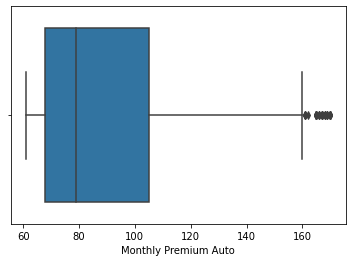

In [15]:
sns.boxplot(data_clean['Monthly Premium Auto'])

<AxesSubplot:xlabel='Income', ylabel='Count'>

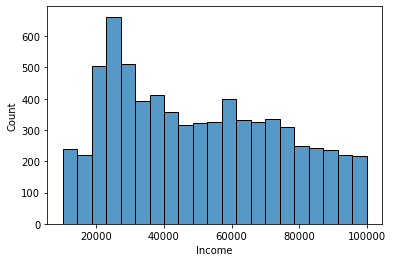

In [16]:
#replace 0 with nan
data_clean['Income'] = data_clean['Income'].replace(0,np.nan)
sns.histplot(data_clean['Income'])

### removing the nan

In [17]:
data_clean = data_clean.dropna(axis = 0, how = 'any')
data_clean = data_clean.reset_index(drop=True)
data_clean

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139.0,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
1,Arizona,5154.764074,No,Extended,High School or Below,Employed,M,82730.0,Urban,Married,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
2,California,5454.587929,No,Basic,Master,Employed,M,66334.0,Suburban,Single,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
3,California,5326.677654,No,Basic,High School or Below,Employed,F,76717.0,Urban,Married,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
4,California,2736.352663,No,Basic,College,Disabled,M,17533.0,Suburban,Married,...,1,Personal Auto,Personal L3,Offer1,Agent,350.400000,Two-Door Car,Medsize,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,Arizona,9075.768214,Yes,Basic,Master,Employed,M,37722.0,Rural,Single,...,8,Personal Auto,Personal L1,Offer1,Agent,158.077504,Sports Car,Medsize,A,1
2944,California,3579.023825,No,Extended,High School or Below,Employed,F,28304.0,Suburban,Married,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
2945,Arizona,2771.663013,No,Basic,College,Employed,M,59855.0,Suburban,Married,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
2946,Oregon,5259.444853,No,Basic,College,Employed,F,61146.0,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


### split dat_clean into numerical and categorical

In [18]:
#numerical
numeric_int = data_clean.select_dtypes(include = int)
numeric_int
numeric_float = data_clean.select_dtypes(include = float)
numeric_float
numerical = pd.concat([numeric_int,numeric_float], axis=1)
numerical

,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Income,Months Since Last Claim,Number of Open Complaints,Total Claim Amount
0,100,31,2,14947.917300,22139.0,34.0,0.0,480.000000
1,127,31,1,5154.764074,82730.0,13.0,0.0,442.521087
2,69,25,4,5454.587929,66334.0,25.0,0.0,331.200000
3,66,10,6,5326.677654,76717.0,26.0,0.0,300.528579
4,73,1,1,2736.352663,17533.0,10.0,0.0,350.400000
...,...,...,...,...,...,...,...,...
2943,116,23,8,9075.768214,37722.0,8.0,0.0,158.077504
2944,91,30,1,3579.023825,28304.0,10.0,2.0,655.200000
2945,74,82,1,2771.663013,59855.0,30.0,4.0,355.200000
2946,65,68,6,5259.444853,61146.0,7.0,0.0,273.018929


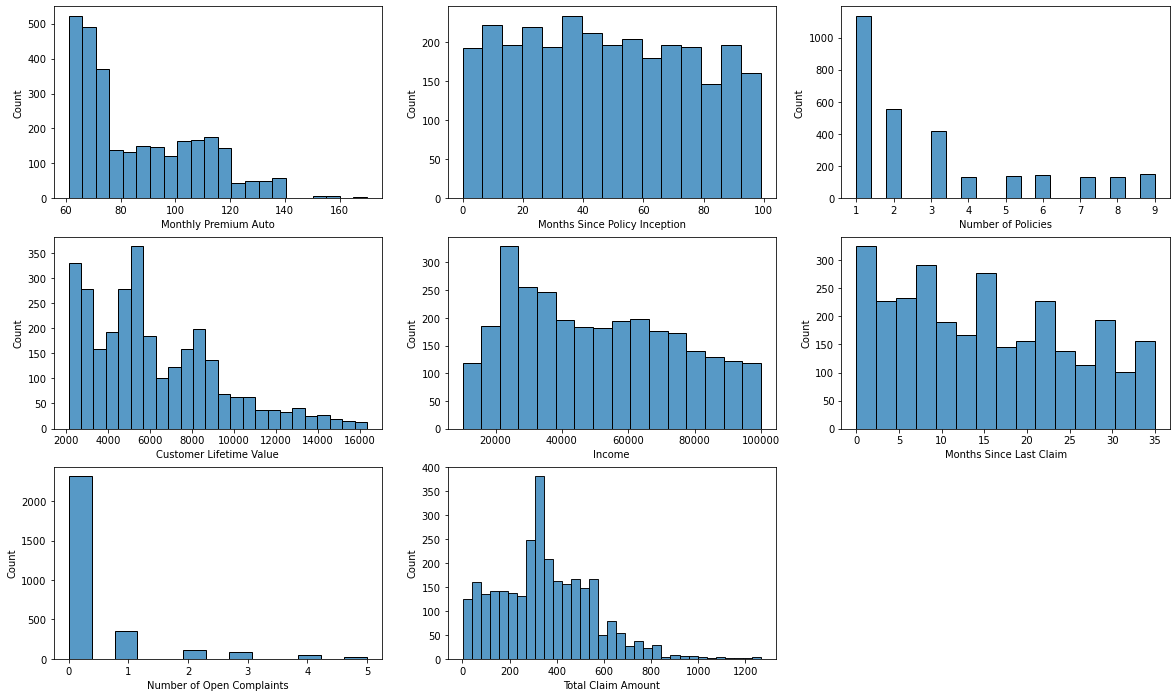

In [19]:
plt.figure(figsize=(20,12))
for i, column in enumerate(numerical.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(numerical[column])

In [20]:
# categorical
categorical = data_clean.select_dtypes(include = object)
categorical

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type,month
0,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,2
1,Arizona,No,Extended,High School or Below,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A,1
2,California,No,Basic,Master,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A,1
3,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A,2
4,California,No,Basic,College,Disabled,M,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,Arizona,Yes,Basic,Master,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Sports Car,Medsize,A,1
2944,California,No,Extended,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A,1
2945,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A,1
2946,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,1


### Dummy values on categorical

In [21]:
#get dummy variables of categorical
categorical_cols = pd.get_dummies(categorical[:], drop_first=True)
categorical_cols

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_2
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
1,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2944,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2945,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2946,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


### XY split + concat numerical and categorical

In [22]:
X = numerical.iloc[:,:-1]
X = pd.concat([X,categorical_cols], axis=1)
X

,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Income,Months Since Last Claim,Number of Open Complaints,State_California,State_Nevada,State_Oregon,...,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_2
0,100,31,2,14947.917300,22139.0,34.0,0.0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
1,127,31,1,5154.764074,82730.0,13.0,0.0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,69,25,4,5454.587929,66334.0,25.0,0.0,1,0,0,...,1,0,1,0,0,0,1,1,0,0
3,66,10,6,5326.677654,76717.0,26.0,0.0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
4,73,1,1,2736.352663,17533.0,10.0,0.0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,116,23,8,9075.768214,37722.0,8.0,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2944,91,30,1,3579.023825,28304.0,10.0,2.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2945,74,82,1,2771.663013,59855.0,30.0,4.0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2946,65,68,6,5259.444853,61146.0,7.0,0.0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [23]:
y = numerical.iloc[:,-1]
y

0       480.000000
1       442.521087
2       331.200000
3       300.528579
4       350.400000
           ...    
2943    158.077504
2944    655.200000
2945    355.200000
2946    273.018929
2947    618.288849
Name: Total Claim Amount, Length: 2948, dtype: float64

### Train-Test Split

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

### Scaling

In [25]:
#Scaling
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test) #only scaler.transform because I already have the parameter in X_train

In [26]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.57329215  0.10278587 -0.41941824 ... -1.57632398 -0.47210259
  -0.94388864]
 [-0.97414759 -1.04051856 -0.41941824 ...  0.63438735 -0.47210259
   1.05944702]
 [ 0.31749772 -0.82614898 -0.01528007 ...  0.63438735 -0.47210259
  -0.94388864]
 ...
 [ 0.98559012 -0.68323593 -0.82355641 ... -1.57632398 -0.47210259
  -0.94388864]
 [ 0.05026076 -0.93333377 -0.82355641 ...  0.63438735 -0.47210259
  -0.94388864]
 [-0.75145012 -1.36207293 -0.41941824 ...  0.63438735 -0.47210259
   1.05944702]]
--------
[[-0.97414759  0.31715545 -0.01528007 ... -1.57632398  2.11818369
  -0.94388864]
 [-0.75145012  0.49579676 -0.41941824 ... -1.57632398  2.11818369
   1.05944702]
 [-0.66237114  0.81735114 -0.01528007 ... -1.57632398  2.11818369
  -0.94388864]
 ...
 [ 1.25282708 -0.14731198 -0.82355641 ...  0.63438735 -0.47210259
   1.05944702]
 [-0.75145012 -1.46925772 -0.82355641 ... -1.57632398  2.11818369
  -0.94388864]
 [-0.61783164  1.31754682 -0.41941824 ...  0.63438735 -0.47210259
   1.05944702]]


### Normalize

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_1454/1414247257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Income']= qt.transform(X_train['Income'].to_numpy().reshape(-1,1))


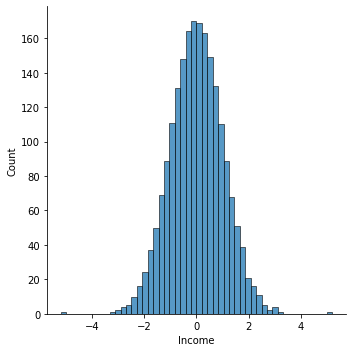

In [27]:
# normalize X_train[Income] applying Quantile Transformer
qt = QuantileTransformer(output_distribution='normal')
qt.fit(X_train['Income'].to_numpy().reshape(-1,1))
X_train['Income']= qt.transform(X_train['Income'].to_numpy().reshape(-1,1))
sns.displot(X_train['Income'])

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_1454/2190979124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Income'] = qt.transform(X_test['Income'].to_numpy().reshape(-1,1))


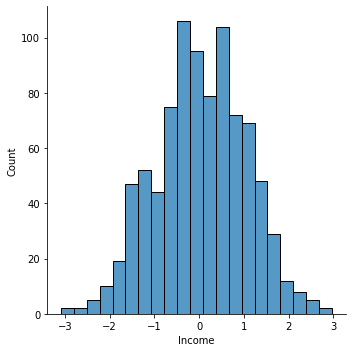

In [28]:
## Income test applying Quantile Transformer
X_test['Income'] = qt.transform(X_test['Income'].to_numpy().reshape(-1,1))
sns.displot(X_test['Income'])

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_1454/4225535690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Customer Lifetime Value']= qt.transform(X_train['Customer Lifetime Value'].to_numpy().reshape(-1,1))


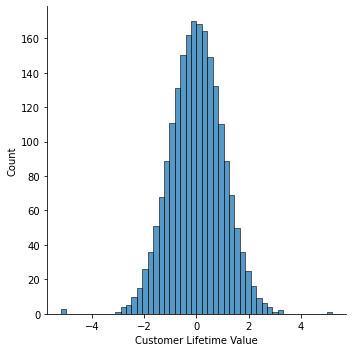

In [29]:
## Customer Lifetime Value applying Quantile Tranformer 
qt = QuantileTransformer(output_distribution='normal')
qt.fit(X_train['Customer Lifetime Value'].to_numpy().reshape(-1,1))
X_train['Customer Lifetime Value']= qt.transform(X_train['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(X_train['Customer Lifetime Value'])

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_1454/2443872633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Monthly Premium Auto']= yj.fit_transform(X_train['Monthly Premium Auto'].to_numpy().reshape(-1,1))


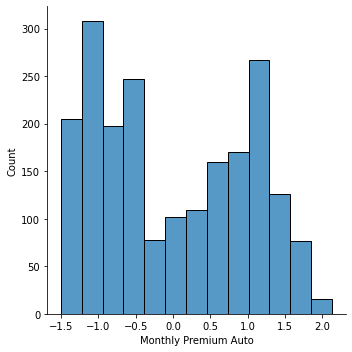

In [30]:
#Monthly Premium Auto X_train with Yeo-Johnson
yj = PowerTransformer(method="yeo-johnson")
yj.fit_transform(X_train['Monthly Premium Auto'].to_numpy().reshape(-1,1))
X_train['Monthly Premium Auto']= yj.fit_transform(X_train['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.displot(X_train['Monthly Premium Auto'])

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_1454/2091955619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Monthly Premium Auto']= yj.fit_transform(X_test['Monthly Premium Auto'].to_numpy().reshape(-1,1))


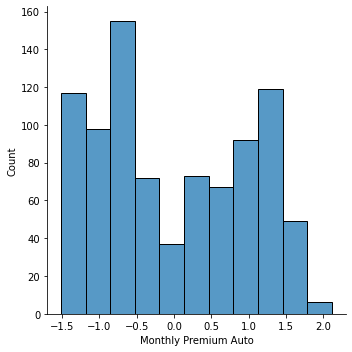

In [31]:
#Monthly Premium Auto X_test with Yeo-Johnson
yj.fit_transform(X_test['Monthly Premium Auto'].to_numpy().reshape(-1,1))
X_test['Monthly Premium Auto']= yj.fit_transform(X_test['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.displot(X_test['Monthly Premium Auto'])

### Applying Linear Regression

In [32]:
# Applying Linear Regression
X.columns

Index(['Monthly Premium Auto', 'Months Since Policy Inception',
       'Number of Policies', 'Customer Lifetime Value', 'Income',
       'Months Since Last Claim', 'Number of Open Complaints',
       'State_California', 'State_Nevada', 'State_Oregon', 'State_Washington',
       'Response_Yes', 'Coverage_Extended', 'Coverage_Premium',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'Gender_M', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Married',
       'Marital Status_Single', 'Policy Type_Personal Auto',
       'Policy Type_Special Auto', 'Policy_Corporate L2',
       'Policy_Corporate L3', 'Policy_Personal L1', 'Policy_Personal L2',
       'Policy_Personal L3', 'Policy_Special L1', 'Policy_Special L2',
       'Policy_Special L3', 'Renew Offer Type_Offer2',
       'Renew Offer Type_Offer3', 'Re

In [33]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     159.5
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:41:03   Log-Likelihood:                -12301.
No. Observations:                2063   AIC:                         2.470e+04
Df Residuals:                    2016   BIC:                         2.496e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        350.7489      2.094    167.482      0.0

In [34]:
#using sklearn
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [35]:
model.coef_ #gives you per column the slope (alpha)

array([ 9.55547264e+01, -3.96386526e+00,  2.45707856e-01,  2.56605112e+00,
       -7.51918829e+00, -3.98476570e-01, -2.43585620e+00,  3.47399735e+00,
        1.27825191e+00,  7.60488791e-01,  1.80982218e+00, -4.14294595e+00,
       -3.31935639e+00, -4.45062839e-02, -2.81042239e+00,  2.68718165e-01,
       -1.18457397e+00, -1.04829460e+00,  2.15019505e+00,  5.94107437e+00,
        8.51513683e-01,  5.03510802e-01,  1.79706359e+02,  8.96313579e+01,
       -2.17368537e+00,  2.94916857e+00,  8.28726256e+13, -1.10934265e+14,
       -2.01291931e-01,  4.72625470e+00, -6.68926918e+13, -7.89616158e+13,
       -9.33215579e+13,  5.40954524e+13,  6.98953842e+13,  6.98953842e+13,
        2.84541626e+00,  9.77919807e-01,  1.80692649e+00,  3.03918411e+00,
        6.24300635e-01,  1.59793354e+00, -3.83875233e+00, -6.99998212e+00,
        1.17575463e+00,  2.87899359e+00,  7.42420055e+00, -1.67457394e+00])

In [36]:
model.intercept_ #gives the optimal slope

350.7530470163281

### R2 Test

In [37]:
R2_test = model.score(X_test_scaled,y_test) # measure R2
R2_test

0.7817166774084707

In [38]:
# Making prediction
y_pred = model.predict(X_test_scaled)   # model prediction on X test
##y_pred_train=model.predict(X_train)  # model prediction on X train (if error_test is suspicious, like too high)
# if error_test >> error_train than is overfitting

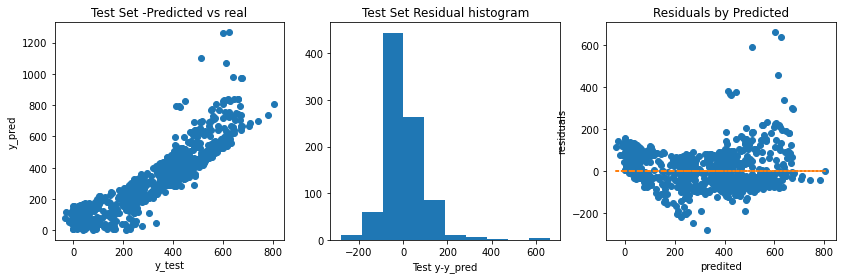

In [39]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [40]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

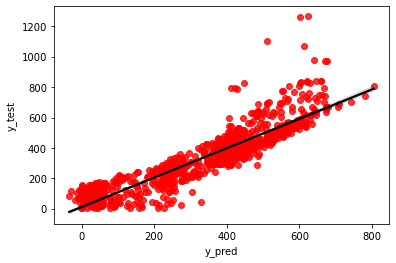

In [41]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Error Metrics

In [42]:
#error metrics
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

8661.350219229133
69.91512750071608


In [43]:
#Feature Importance
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
27,Policy Type_Special Auto,1.109343e+14
32,Policy_Personal L3,9.332156e+13
26,Policy Type_Personal Auto,8.287263e+13
31,Policy_Personal L2,7.896162e+13
34,Policy_Special L2,6.989538e+13
35,Policy_Special L3,6.989538e+13
30,Policy_Personal L1,6.689269e+13
33,Policy_Special L1,5.409545e+13
22,Location Code_Suburban,1.797064e+02
0,Monthly Premium Auto,9.555473e+01


### Comparing Regression Model

#### Embedded Methods

In [44]:
#X_train = X_train.select_dtypes(include=np.number)
#X_test  = X_test.select_dtypes(include=np.number)

In [45]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#X_train=imp_mean.fit_transform(X_train)

#### LASSO model

In [46]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=10)

model.fit(X_train_scaled, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_scaled, y_train)}, Test -> {model.score(X_test_scaled, y_test)}")

Lasso: Train -> 0.763824345520655, Test -> 0.7741470187690832


#### RIDGE model

In [47]:
model=Ridge(alpha=100)
model.fit(X_train_scaled, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_scaled, y_train)}, Test -> {model.score(X_test_scaled, y_test)}")

Ridge: Train -> 0.7785419706085897, Test -> 0.7794854775707825


#### Linear regression

In [48]:
model=LinearRegression()
model.fit(X_train_scaled, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train_scaled, y_train)}, Test -> {model.score(X_test_scaled, y_test)}")

LinearRegression: Train -> 0.7844220656278437, Test -> 0.7817166774084707


### Compare models in a Function

In [49]:
def model_comparison(a, b, c, d):
    models = [Lasso(), Ridge(), LinearRegression()]
    for model in models:
        model.fit(a, c)
        print(f"{model.__class__.__name__}: Train -> {model.score(a, c)}, Test -> {model.score(b, d)}")  

In [50]:
model_comparison(X_train_scaled, X_test_scaled, y_train, y_test)

Lasso: Train -> 0.7831625609355198, Test -> 0.7833268225123741
Ridge: Train -> 0.7844202402864688, Test -> 0.7817353022021669
LinearRegression: Train -> 0.7844220656278437, Test -> 0.7817166774084707


### Feature selection techniques

In [51]:
from sklearn.feature_selection import RFE

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 5, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(pd.DataFrame(X_train).iloc[:,kept_features].columns)

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

In [52]:
X_train_scaled = selector.transform(X_train_scaled)
X_test_scaled  = selector.transform(X_test_scaled)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=kept_features)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=kept_features)

print("Final selected features: ")
display(X_train_scaled)

Final selected features: 


,Monthly Premium Auto,Coverage_Premium,Location Code_Suburban,Location Code_Urban,Vehicle Class_SUV
0,-0.573292,-0.281025,0.961478,-0.560368,-0.483582
1,-0.974148,-0.281025,-1.040065,-0.560368,-0.483582
2,0.317498,-0.281025,-1.040065,1.784540,-0.483582
3,0.050261,-0.281025,-1.040065,-0.560368,-0.483582
4,-1.152306,-0.281025,0.961478,-0.560368,-0.483582
...,...,...,...,...,...
2058,1.787301,-0.281025,0.961478,-0.560368,2.067901
2059,0.139340,-0.281025,0.961478,-0.560368,-0.483582
2060,0.985590,3.558406,-1.040065,1.784540,-0.483582
2061,0.050261,-0.281025,0.961478,-0.560368,-0.483582


### P-Value

In [53]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston

In [54]:
X_added_constant = sm.add_constant(X)
X_added_constant

,const,Monthly Premium Auto,Months Since Policy Inception,Number of Policies,Customer Lifetime Value,Income,Months Since Last Claim,Number of Open Complaints,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,month_2
0,1.0,100,31,2,14947.917300,22139.0,34.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
1,1.0,127,31,1,5154.764074,82730.0,13.0,0.0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,1.0,69,25,4,5454.587929,66334.0,25.0,0.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
3,1.0,66,10,6,5326.677654,76717.0,26.0,0.0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
4,1.0,73,1,1,2736.352663,17533.0,10.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,1.0,116,23,8,9075.768214,37722.0,8.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2944,1.0,91,30,1,3579.023825,28304.0,10.0,2.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2945,1.0,74,82,1,2771.663013,59855.0,30.0,4.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
2946,1.0,65,68,6,5259.444853,61146.0,7.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [55]:
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Claim Amount   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:41:08   Log-Likelihood:                -17560.
No. Observations:                2948   AIC:                         3.521e+04
Df Residuals:                    2901   BIC:                         3.550e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -268.3152     26.790    -10.015      0.000    -320.845    -215.785
Monthly Premium Auto               4.4616      0.332     13.444      0.000       3.811       5.112
Months Since Policy Inception     -0.1039      0.063     -1.654      0.098      -0.227       0.019
Number of Policies                -0.0198      0.744     -0.027      0.979      -1.479       1.440
Customer Lifetime Value            0.0013      0.001      2.069      0.039    7.06e-05       0.003
Income                            -0.0002   8.95e-05     -2.556      0.011      -0.000   -5.32e-05
Months Since Last Claim            0.0462      0.174      0.266      0.790      -0.295       0.387
Number of Open Complaints         -2.0715      1.926     -1.076      0.282      -5.848       1.705
State_California                   1.8500      4.986      0.371      0.711      -7.927      11.627
State_Nevada                      -1.4994      6.868     -0.218      0.827     -14.967      11.968
State_Oregon                      -2.5247      5.142     -0.491      0.623     -12.607       7.557
State_Washington                   2.1895      7.016      0.312      0.755     -11.567      15.946
Response_Yes                      -7.7952      5.344     -1.459      0.145     -18.274       2.684
Coverage_Extended                -11.5306      7.784     -1.481      0.139     -26.793       3.732
Coverage_Premium                 -11.9108     15.891     -0.750      0.454     -43.070      19.249
Education_College                 -6.0307      4.544     -1.327      0.185     -14.940       2.879
Education_Doctor                   2.9542      8.981      0.329      0.742     -14.655      20.563
Education_High School or Below    -3.4424      4.733     -0.727      0.467     -12.722       5.838
Education_Master                 -10.0691      6.591     -1.528      0.127     -22.992       2.854
EmploymentStatus_Employed         -5.7187      8.197     -0.698      0.485     -21.792      10.354
EmploymentStatus_Medical Leave     9.9229     10.087      0.984      0.325      -9.855      29.700
EmploymentStatus_Retired          -7.3162     11.807     -0.620      0.536     -30.467      15.835
Gender_M                           3.3080      3.526      0.938      0.348      -3.606      10.222
Location Code_Suburban           354.9526      4.694     75.613      0.000     345.748     364.157
Location Code_Urban              204.7289      5.048     40.556      0.000     194.831     214.627
Marital Status_Married            -4.7689      5.015     -0.951      0.342     -14.601       5.064
Marital Status_Single              5.8433      6.204      0.942      0.346      -6.321      18.008
Policy Type_Personal Auto          9.8330      6.873      1.431      0.153      -3.643      23.309
Policy Type_Sp

In [56]:
## drop features with pval < 0.05
pv = model.pvalues
X_pfiltered = X_added_constant[pv[pv < 0.05].index].drop('const', axis=1).reset_index(drop=True)
X_pfiltered.shape

(2948, 9)

In [57]:
X_pfiltered

,Monthly Premium Auto,Customer Lifetime Value,Income,Location Code_Suburban,Location Code_Urban,Policy_Personal L1,Renew Offer Type_Offer2,Vehicle Class_Sports Car,Vehicle Size_Small
0,100,14947.917300,22139.0,1,0,0,0,0,0
1,127,5154.764074,82730.0,0,1,0,1,0,0
2,69,5454.587929,66334.0,1,0,0,0,0,0
3,66,5326.677654,76717.0,0,1,0,0,0,0
4,73,2736.352663,17533.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2943,116,9075.768214,37722.0,0,0,1,0,1,0
2944,91,3579.023825,28304.0,1,0,0,1,0,0
2945,74,2771.663013,59855.0,1,0,0,1,0,0
2946,65,5259.444853,61146.0,0,1,0,1,0,0
